In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


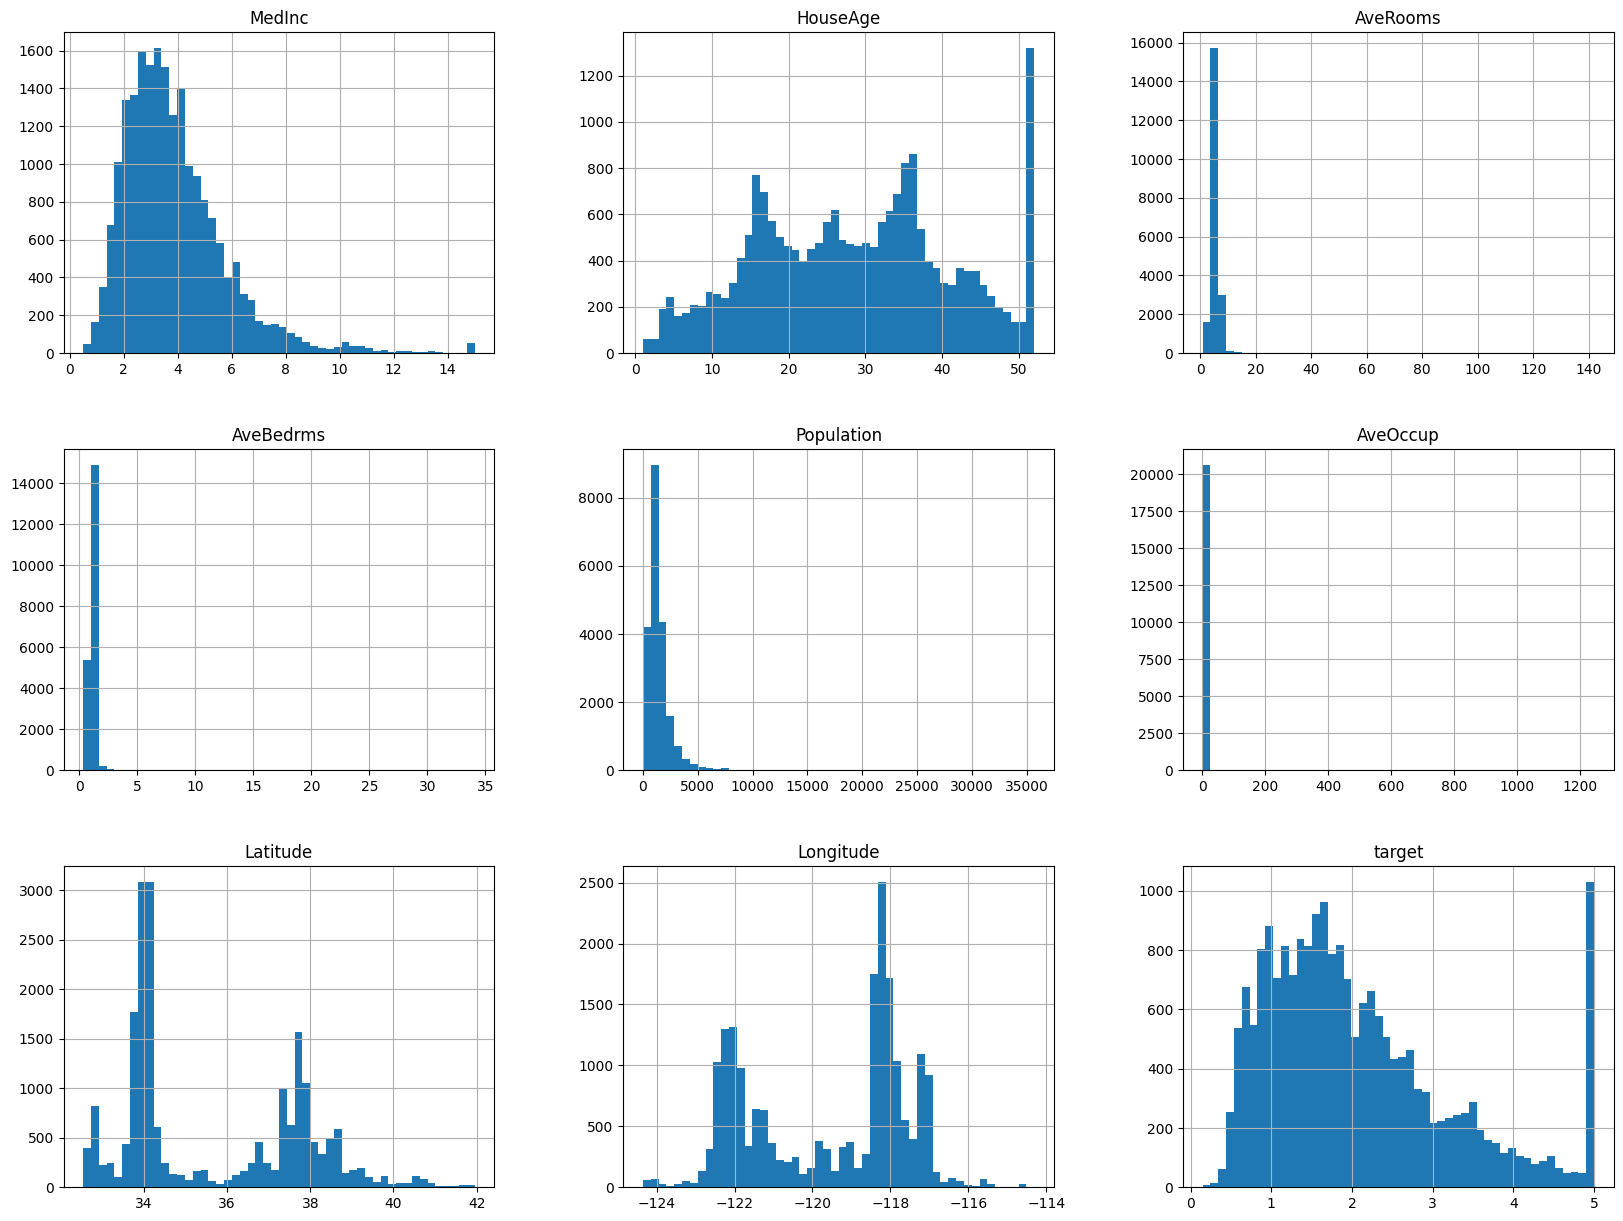

In [3]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [16]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
data = df[['MedInc','HouseAge','AveRooms']]
target = df['target']

### 해당 변수를 선택한 이유
- 상관관계 분석을 했을때 target과 양의 정수값으로 표현되어있는 걸 선택을 함.

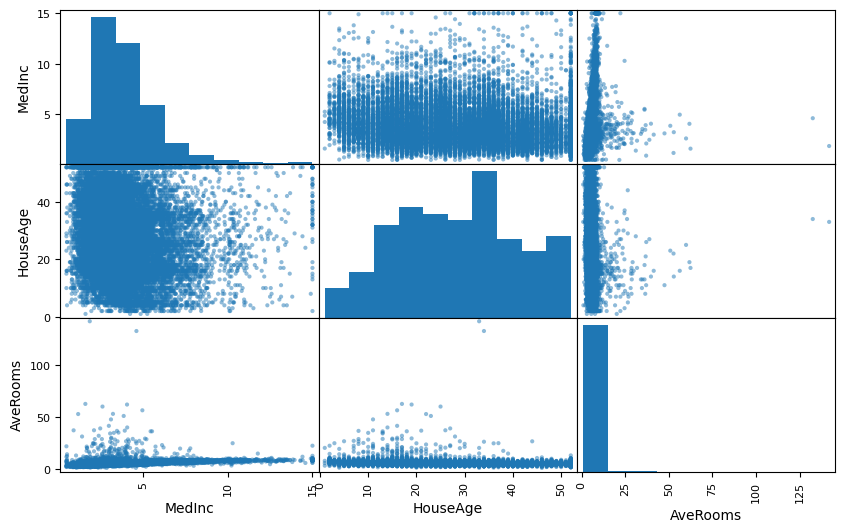

In [24]:
from pandas.plotting import scatter_matrix
attributes = ['MedInc','HouseAge','AveRooms']
scatter_matrix(df[attributes], figsize=(10, 6))
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=111)

In [19]:
rmse_val = []
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)
print(min(rmse_val))

Rmse  1 = 1.0499807005066033
Rmse  2 = 0.9002783081678185
Rmse  3 = 0.8497540690728341
Rmse  4 = 0.8238510383171507
Rmse  5 = 0.8102843694642904
Rmse  6 = 0.7989699130165455
Rmse  7 = 0.7916892393790627
Rmse  8 = 0.7852793677413641
Rmse  9 = 0.7807879933456005
Rmse  10 = 0.7781050415851386
Rmse  11 = 0.7766589534425096
Rmse  12 = 0.7735563762342466
Rmse  13 = 0.7738730330093576
Rmse  14 = 0.7709503893177867
Rmse  15 = 0.7693799466522119
Rmse  16 = 0.7682604650776355
Rmse  17 = 0.7668878227359857
Rmse  18 = 0.7665616717122425
Rmse  19 = 0.7667009766573143
Rmse  20 = 0.7660625107057348
Rmse  21 = 0.7656304604141754
Rmse  22 = 0.7648120220206254
Rmse  23 = 0.7647904837026075
Rmse  24 = 0.7647556268640784
Rmse  25 = 0.7636010268453045
Rmse  26 = 0.7638346277114325
Rmse  27 = 0.7637300545625596
Rmse  28 = 0.7621909586928124
Rmse  29 = 0.761420331615938
Rmse  30 = 0.7608876489749169
Rmse  31 = 0.7603905319264286
Rmse  32 = 0.7607327792890768
Rmse  33 = 0.7605866216288074
Rmse  34 = 0.7605895

In [21]:
rmse_val = []
for K in range(60):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)
print(min(rmse_val))

Rmse  1 = 1.0499807005066033
Rmse  2 = 0.9002783081678185
Rmse  3 = 0.8497540690728341
Rmse  4 = 0.8238510383171507
Rmse  5 = 0.8102843694642904
Rmse  6 = 0.7989699130165455
Rmse  7 = 0.7916892393790627
Rmse  8 = 0.7852793677413641
Rmse  9 = 0.7807879933456005
Rmse  10 = 0.7781050415851386
Rmse  11 = 0.7766589534425096
Rmse  12 = 0.7735563762342466
Rmse  13 = 0.7738730330093576
Rmse  14 = 0.7709503893177867
Rmse  15 = 0.7693799466522119
Rmse  16 = 0.7682604650776355
Rmse  17 = 0.7668878227359857
Rmse  18 = 0.7665616717122425
Rmse  19 = 0.7667009766573143
Rmse  20 = 0.7660625107057348
Rmse  21 = 0.7656304604141754
Rmse  22 = 0.7648120220206254
Rmse  23 = 0.7647904837026075
Rmse  24 = 0.7647556268640784
Rmse  25 = 0.7636010268453045
Rmse  26 = 0.7638346277114325
Rmse  27 = 0.7637300545625596
Rmse  28 = 0.7621909586928124
Rmse  29 = 0.761420331615938
Rmse  30 = 0.7608876489749169
Rmse  31 = 0.7603905319264286
Rmse  32 = 0.7607327792890768
Rmse  33 = 0.7605866216288074
Rmse  34 = 0.7605895